# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fajar Nur Ariyanta
- **Email:** fajarnurariyantafajar@gmail.com
- **ID Dicoding:** fajar_nur_ariyanta

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana hubungan antara kondisi cuaca dan jumlah rata-rata penyewaan sepeda?
- Pertanyaan 2 : Bagaimana pola rata-rata penyewaan sepeda berubah sepanjang tahun berdasarkan bulan?


## Menyaipkan semua library yang dibuthkan

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [67]:
day_df = pd.read_csv("https://raw.githubusercontent.com/fajarnyt/analisa/master/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/fajarnyt/analisa/master/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Menilai tabel day_df

In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Berdasarkan hasil di atas, tidak terlihat ada masalah pada tipe data tiap kolom dalam day_df

In [70]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

terdapat 0 missing value pada semua kolom

In [71]:
#memeriksa duplikasi dan ringkasan parameter statistik dari day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak terdapat keanehan disetiap kolom ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada day_df

- Menilai tabel hour_df

In [73]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil di atas, tidak terlihat ada masalah pada tipe data tiap kolom dalam day_df

In [74]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya

In [75]:
#memeriksa duplikasi dan ringkasan parameter statistik dari hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [76]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan disetiap kolom :ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada hour_df

Setelah berhasil mengidentifikasi berbagai masalah pada data menghasilkan rangkuman dibawah ini

> Duplicate data  : 0

> Missing value   : 0

> Inaccurate value: 0







## Cleaning Data

Pada langkah sebelumnya Assessing Data tidak ditemukan masalah pada isi data maka disimpulkan kedua data day_df dan hour_df telah bersih

Berikut merupakan kode untuk menghapus duplikasi pada kedua data dan memastikan nya lagi benar-benar bersih dari duplikat

In [77]:
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0
Jumlah duplikasi pada hour_df:  0


## Exploratory Data Analysis (EDA)

### Explore ...

1.  Dibawah ini fungsi merge dari Pandas untuk menggabungkan dua DataFrame, yaitu hour_df dan day_df, kemudian Hasil penggabungan disimpan dalam DataFrame baru yang disebut all_df

In [78]:
all_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


2. Dibawah ini kode cuaca yang awalnya direpresentasikan dalam bentuk angka pada kolom 'weathersit_day' sekarang diubah menjadi label yang lebih mudah dipahami sesuai dengan kamus yang telah didefinisikan. Contohnya, nilai 1 pada 'weathersit_day' akan diubah menjadi 'Cerah', nilai 2 menjadi 'Berkabut', dan seterusnya.

In [79]:
weather_labels = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Berat'
}

all_df['weather_label'] = all_df['weathersit_day'].map(weather_labels)

3. dibawah ini untuk melihat ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada all_df sekaligus melihat kolom baru bernama 'weather_label' ditambahkan ke DataFrame all_df

In [80]:
all_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


4. Dibawah ini menggunakan metode to_csv dari Pandas untuk menyimpan DataFrame all_df ke dalam file CSV dengan nama "semua_data.csv" untuk digunakan pada pengembangan dashboard

In [81]:
all_df.to_csv("semua_data.csv", index=False)

5. Dibawah ini menunjukkan rata-rata jumlah penyewa sepeda per hari untuk setiap kondisi cuaca, diurutkan berdasarkan nilai rata-rata 'cnt_day' secara menaik.
Cuaca 'Cerah' memiliki rata-rata jumlah penyewa sepeda tertinggi, diikuti oleh 'Berkabut' dan 'Hujan Ringan'.

In [82]:
all_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
2,Hujan Ringan,1914.700855
0,Berkabut,4062.717595
1,Cerah,4895.177083


6. Dibawah ini melakukan operasi pengelompokan pada DataFrame all_df berdasarkan jam ('hr') dan kemudian menghitung rata-rata jumlah penyewa sepeda ('cnt_hour') pada setiap jam

In [83]:
all_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


 7. Dibawah ini menunjukkan rata-rata jumlah penyewa sepeda per hari untuk hari kerja dan hari non-kerja,  terlihat bahwa rata-rata jumlah penyewa sepeda lebih tinggi pada hari kerja (workingday_day=1) dibandingkan dengan hari non-kerja (workingday_day=0).

In [84]:
all_df.groupby('workingday_day')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,workingday_day,cnt_day
0,0,4341.834059
1,1,4622.855204


8. melakukan operasi pengelompokan pada DataFrame bike_dataFrame berdasarkan kombinasi hari dalam seminggu (weekday) dan jam dalam sehari (hour). Setelah itu, dihitung rata-rata jumlah penyewa sepeda ('cnt_day') untuk setiap kombinasi tersebut. Hasilnya diurutkan berdasarkan rata-rata jumlah penyewa sepeda dari yang terkecil ke yang terbesar.

*   Hari 5 (Jumat) pada jam 5 (5 pagi) dengan rata-rata 4700.84 penyewa sepeda.
*   Hari 0 (Minggu) pada jam 0 (12 malam) dengan rata-rata 4239.51 penyewa sepeda.



In [85]:
all_df.groupby('weekday_hour')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,weekday_hour,cnt_day
0,0,4239.505995
1,1,4391.920936
6,6,4561.544188
2,2,4566.708113
3,3,4574.609293
5,5,4700.838359
4,4,4703.503440


9.  Membuat kolom baru 'weekend' yang menandakan apakah hari adalah akhir pekan (0: bukan akhir pekan, 1: akhir pekan) dan mengelompokkan DataFrame berdasarkan kolom 'weekend' dan menghitung jumlah penyewa sepeda

In [86]:
all_df['weekend'] = all_df['weekday_hour'].apply(lambda x: 1 if x >= 5 else 0)
weekend_counts = all_df.groupby('weekend')['cnt_day'].sum().reset_index()
print(weekend_counts)

   weekend   cnt_day
0        0  55641466
1        1  23149584


10. Hasil pengelompokan dan perhitungan rata-rata jumlah penyewa sepeda pada DataFrame all_df berdasarkan kolom 'holiday_day' adalah sebagai berikut:
*   Pada hari libur (holiday_day=1), rata-rata jumlah penyewa sepeda adalah 3750.06
*   Pada hari biasa (holiday_day=0), rata-rata jumlah penyewa sepeda adalah 4556.91



In [87]:
all_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


11. Perhitungan rata-rata jumlah penyewa sepeda pada DataFrame all_df berdasarkan kolom bulan 'mnth_day'

In [88]:
all_df.groupby('mnth_day')['cnt_day'].mean()

mnth_day
1     2228.370189
2     2671.260999
3     3709.164969
4     4484.418928
5     5349.774194
6     5772.366667
7     5563.677419
8     5689.239322
9     5772.107864
10    5319.965541
11    4245.956159
12    3411.030344
Name: cnt_day, dtype: float64

12. Menghitung frekuensi cuaca cerah setiap bulan dengan jumlah penyewa sepeda

In [89]:
all_df[all_df['weather_label'] == 'Cerah'].groupby('mnth_day')['cnt_day'].mean()


mnth_day
1     2413.245041
2     2857.919448
3     3896.530303
4     5328.191874
5     5698.324324
6     6061.521739
7     5516.980392
8     5845.625366
9     6735.887484
10    5859.281250
11    4394.522388
12    3511.083660
Name: cnt_day, dtype: float64

13. Jumlah total penyewa sepeda registered dan casual

In [90]:
#memberikan jumlah total penyewa sepeda terdaftar
all_df.registered_day.sum()

63943480

In [91]:
#memberikan jumlah total penyewa sepeda casual
all_df.casual_day.sum()

14847570

## Visualization & Explanatory Analysis

### Pertanyaan 1:
> Bagaimana hubungan antara kondisi cuaca dan jumlah rata-rata penyewaan sepeda?




<ipython-input-92-724e535b16c5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='cnt_day', data=avg_weather, palette='coolwarm', hatch='/')


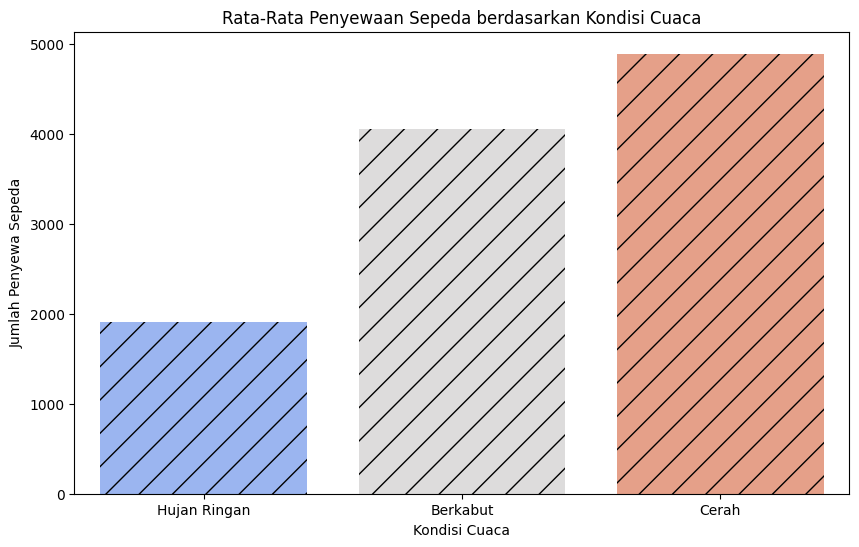

In [92]:
avg_weather = all_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='cnt_day', data=avg_weather, palette='coolwarm', hatch='/')

plt.title('Rata-Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.xlabel('Kondisi Cuaca')

plt.show()


### Pertanyaan 2:
> Baaimana perubahan rata-rata penyewaan sepeda untuk setiap bulan dalam setahun



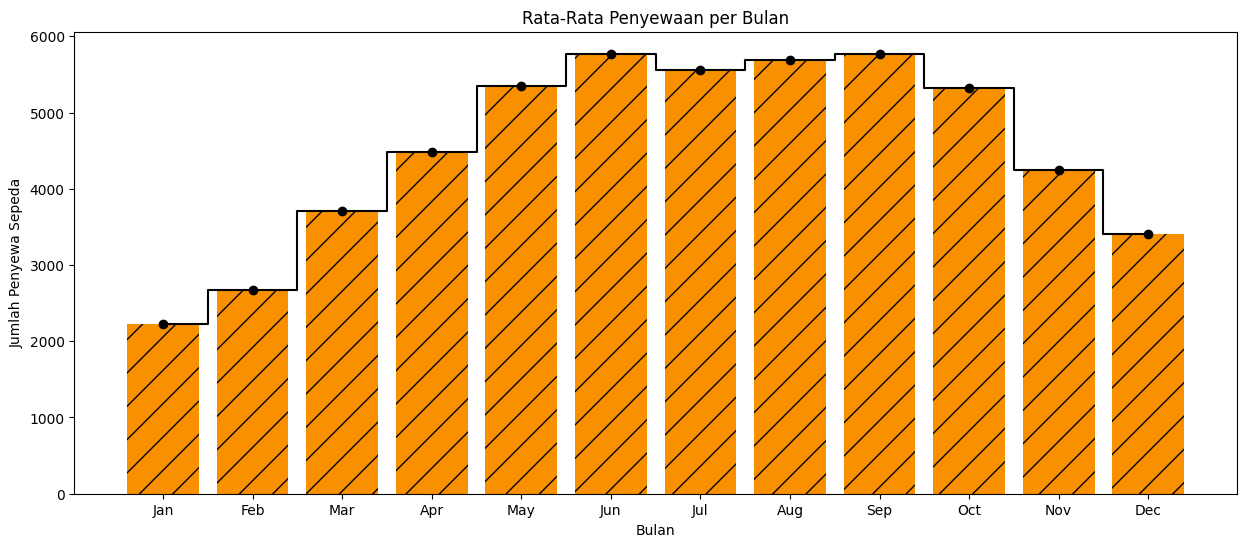

In [113]:
sewa_bulan = all_df.groupby('mnth_day')['cnt_day'].mean()
sewa_bulan.index = sewa_bulan.index.map(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(15, 6))
plt.step(sewa_bulan.index, sewa_bulan.values, where='mid', color='black', linestyle='-', marker='o')
plt.bar(sewa_bulan.index, sewa_bulan.values, color='#f99000', hatch='/')
plt.xticks(sewa_bulan.index, sewa_bulan.index)

plt.title('Rata-Rata Penyewaan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')

plt.show()


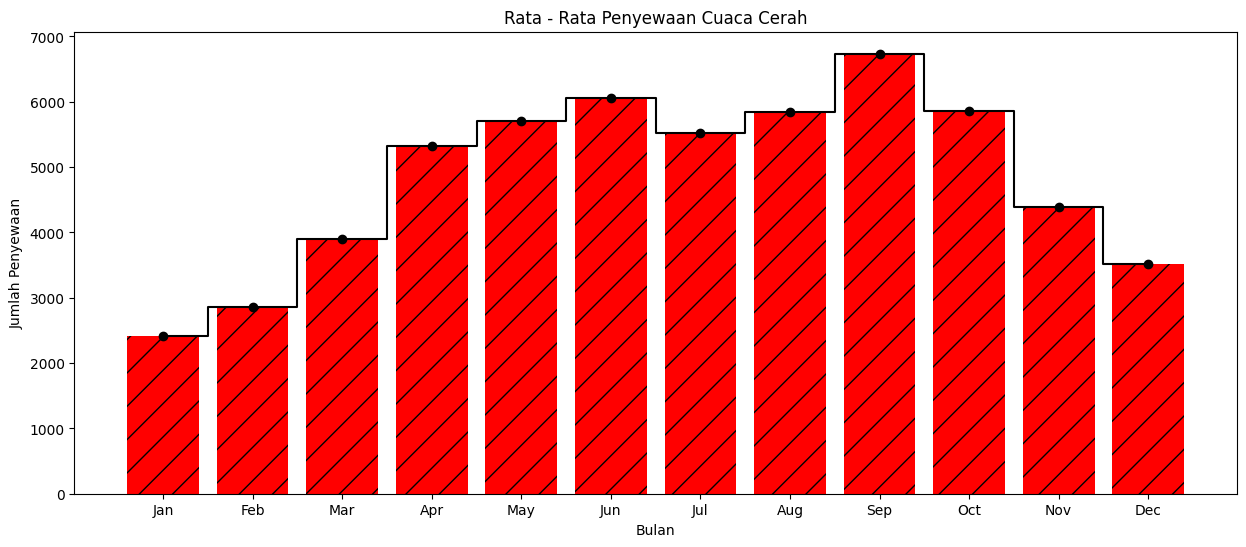

In [114]:
sewa_cerah = all_df[all_df['weather_label'] == 'Cerah'].groupby('mnth_day')['cnt_day'].mean()
plt.figure(figsize=(15, 6))
plt.step(sewa_cerah.index, sewa_cerah.values, where='mid', color='black', linestyle='-', marker='o')
plt.bar(sewa_cerah.index, sewa_cerah.values, color='red', hatch='/')
plt.xticks(sewa_cerah.index, sewa_cerah.index)

plt.title('Rata - Rata Penyewaan Cuaca Cerah')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')

plt.show()

## RFM Analysis

1. Berapa hari yang telah berlalu sejak transaksi sewa sepeda terakhir kali dilakukan oleh pelanggan?
2. Berapa frekuensi transaksi sewa sepeda yang dilakukan oleh pelanggan?
3. Berapa total nilai transaksi yang dihasilkan oleh pelanggan, baik oleh pelanggan terdaftar maupun pelanggan non-terdaftar?

In [95]:
# Ubah kolom 'dteday' menjadi tipe data datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Menghitung Recency, Frequency, dan Monetary berdasarkan tanggal transaksi
rfm_df = all_df.groupby('dteday').agg({
    'dteday': lambda date: (all_df['dteday'].max() - date.max()).days, # Menghitung Recency dengan mengurangi tanggal transaksi terakhir dari tanggal transaksi maksimum dalam dataframe (dalam satuan hari)
    'cnt_day': 'count',
    'registered_day': 'sum',
    'casual_day': 'sum'
}).rename(columns={
    'dteday': 'Recency',
    'cnt_day': 'Frequency',
    'registered_day': 'Monetary_Registered',
    'casual_day': 'Monetary_Casual'
})

# Menampilkan lima baris pertama dari dataframe hasil
print(rfm_df.head())


            Recency  Frequency  Monetary_Registered  Monetary_Casual
dteday                                                              
2011-01-01      730         24                15696             7944
2011-01-02      729         23                15410             3013
2011-01-03      728         22                27038             2640
2011-01-04      727         23                33442             2484
2011-01-05      726         23                34914             1886


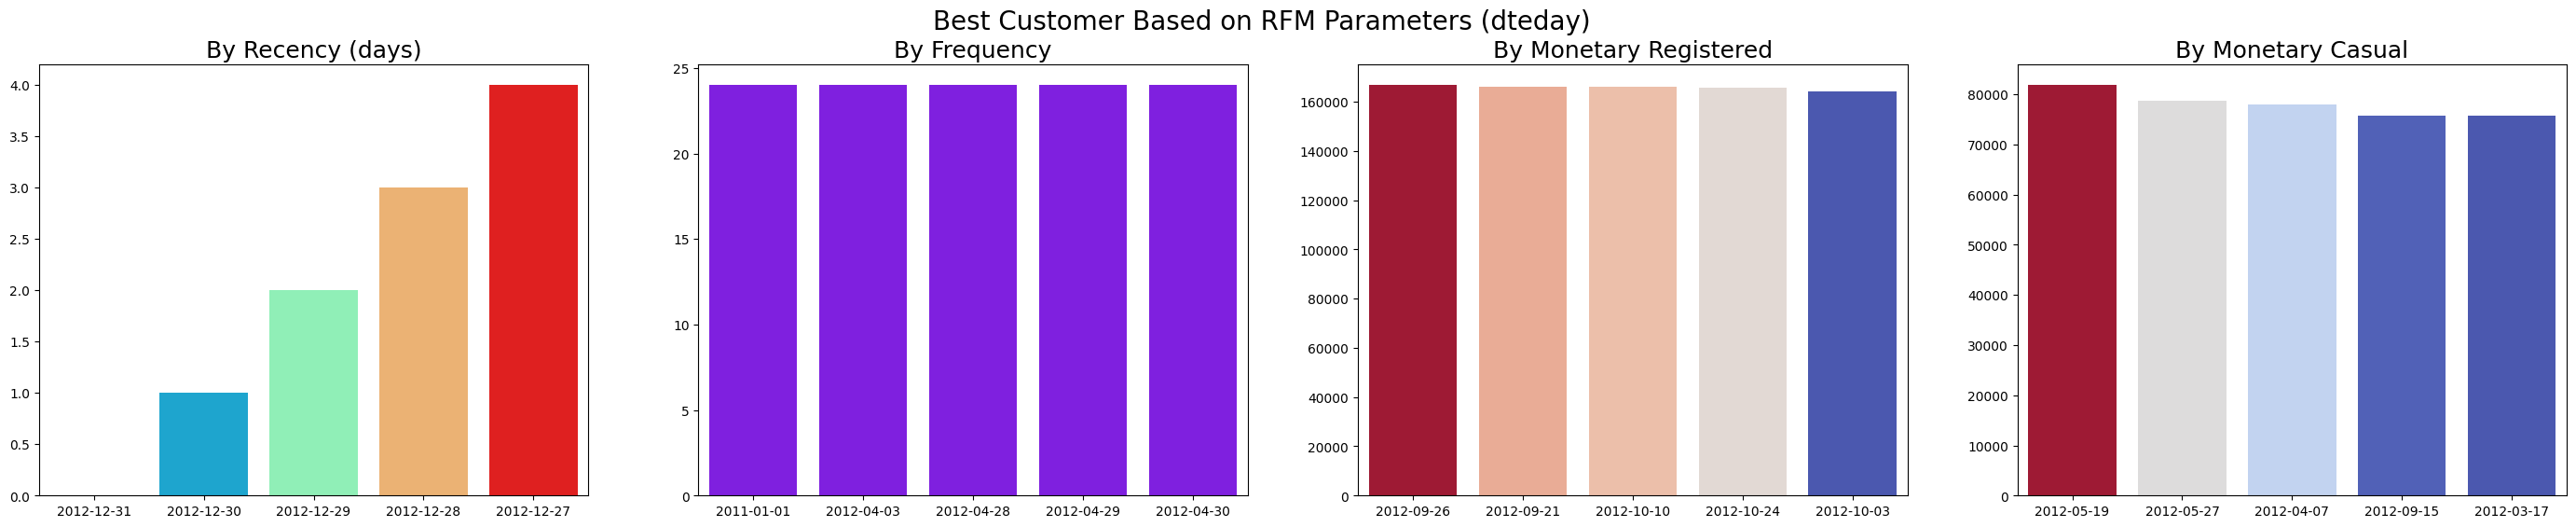

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(35, 6))

sns.barplot(y="Recency", x="dteday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), hue="Recency", palette='rainbow', ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="Frequency", x="dteday", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), hue="Frequency", palette='rainbow', ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10)

sns.barplot(y="Monetary_Registered", x="dteday", data=rfm_df.sort_values(by="Monetary_Registered", ascending=False).head(5), hue="Monetary_Registered", palette='coolwarm', ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary Registered", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10)

sns.barplot(y="Monetary_Casual", x="dteday", data=rfm_df.sort_values(by="Monetary_Casual", ascending=False).head(5), hue="Monetary_Casual", palette='coolwarm', ax=ax[3], legend=False)
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_title("By Monetary Casual", loc="center", fontsize=18)
ax[3].tick_params(axis='x', labelsize=10)

plt.suptitle("Best Customer Based on RFM Parameters (dteday)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1
> Bagaimana hubungan antara kondisi cuaca dan jumlah rata-rata penyewaan sepeda?
> Jawaban: Dari hasil analisis, terlihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah rata-rata penyewaan sepeda. Penyewaan sepeda cenderung lebih rendah saat cuaca hujan ringan, sementara cuaca cerah cenderung meningkatkan jumlah penyewaan sepeda. Cuaca berkabut menunjukkan tingkat penyewaan sepeda yang sedang di antara kondisi cuaca lainnya.




- Conclution pertanyaan 2
> Bagaimana pola rata-rata penyewaan sepeda berubah sepanjang tahun berdasarkan bulan?
Jawaban: Dari hasil analisis, dapat dilihat bahwa rata-rata jumlah penyewaan sepeda setiap bulan memiliki fluktuasi yang signifikan. Penyewaan sepeda mencapai puncaknya pada bulan dengan cuaca hangat seperti bulan Juni, Juli, dan Agustus, sementara jumlah penyewaan cenderung lebih rendah pada bulan-bulan dengan cuaca lebih dingin seperti Januari, Februari, dan Desember.



